This notebook checks to see that the phospho sites for EGFR are correlated. It shows the pearson correlation graphs for different EGFR sites for the cancer types that have enough measurments. 

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u


In [2]:
colon = cptac.Colon()

In [3]:
# load all cptac cancers
brain = cptac.Gbm()
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
hnscc = cptac.Hnscc()

brca = cptac.Brca()
luad = cptac.Luad()
Ovar = cptac.Ovarian()
Lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 8)


In [177]:
def plot_lin_regression(df1,x_axis, y_axis, hue, title = "Title", ra_stats = False, show_plot = True, save_file_name = "file_name"):
    #format dfs 
    df1_subset = df1[[x_axis,y_axis,hue]]
    #df1_subset.columns = df1_subset.columns.droplevel(1)
    #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
    df1_subset = df1_subset.dropna(axis=0, how="any")

    x1 = df1_subset[[x_axis]].values
    y1 = df1_subset[[y_axis]].values
    x1 = x1[:,0]
    y1 = y1[:,0]

    #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    corr, pval = scipy.stats.pearsonr(x1,y1)
        
    sns.set(style="darkgrid")
    plt.rcParams["figure.figsize"] = (30,22)
    graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
    sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
    graph.set(title = title)
   
    
    if ra_stats:
     
        pval = myTrunc(pval,50)
        corr = myTrunc(corr,3)
        #"Slope of regression: %s\nR-squared: %s\nPvalue: %s" %
        plt.text(-4,5, "Correlation: %s\nPvalue: %s"%(corr,pval))
        
    if save_file_name != "file_name":
        
        #plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.savefig(save_file_name+'.png')
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()
        
    
    

In [40]:
def myTrunc(theNumber, theDigits):

    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


In [92]:
phospho = brain.join_omics_to_mutations(omics_df_name="phosphoproteomics", mutations_genes="EGFR",
omics_genes=["EGFR"])

phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.map('_'.join)
phospho
phospho[["EGFR_phosphoproteomics_Y1092","EGFR_phosphoproteomics_Y1110","EGFR_phosphoproteomics_Y1197","EGFR_phosphoproteomics_Y1172","Sample_Status_"]]


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


,EGFR_phosphoproteomics_Y1092,EGFR_phosphoproteomics_Y1110,EGFR_phosphoproteomics_Y1197,EGFR_phosphoproteomics_Y1172,Sample_Status_
Patient_ID,,,,,
C3L-00104,NaN,0.713628,2.326907,1.977394,Tumor
C3L-00365,NaN,1.900383,4.392495,3.831216,Tumor
C3L-00674,0.421457,-0.851118,0.521459,-0.152648,Tumor
C3L-00677,-1.548885,0.399811,-1.272197,-1.365995,Tumor
C3L-01040,NaN,-0.209843,-3.047771,-0.710159,Tumor
...,...,...,...,...,...
PT-RN5K.N,NaN,0.724218,-2.344513,0.075548,Normal
PT-RU72.N,-2.541386,NaN,-1.782821,-0.987732,Normal
PT-UTHO.N,NaN,1.202292,-0.916841,-1.783118,Normal


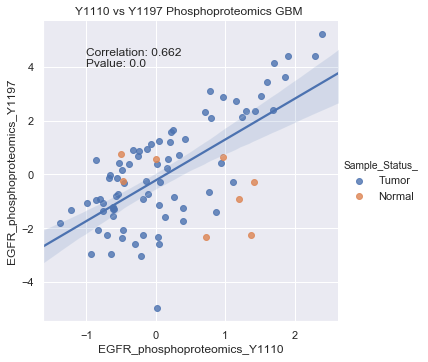

In [98]:
plot_lin_regression(phospho,"EGFR_phosphoproteomics_Y1110","EGFR_phosphoproteomics_Y1197","Sample_Status_",title = "Y1110 vs Y1197 Phosphoproteomics GBM ", ra_stats = True, show_plot = True)


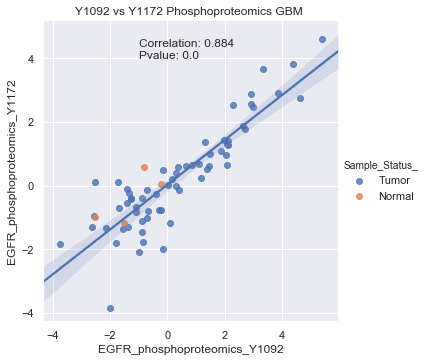

In [102]:
plot_lin_regression(phospho,"EGFR_phosphoproteomics_Y1092","EGFR_phosphoproteomics_Y1172","Sample_Status_", title = "Y1092 vs Y1172 Phosphoproteomics GBM ", ra_stats = True, show_plot = True)


In [66]:
phospho = ccrcc.get_phosphoproteomics()
phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.map('_'.join)
#phospho[["EGFR_Y1092","EGFR_Y1110","EGFR_Y1197","EGFR_Y1172"]]
phospho.filter(like='EGFR_Y', axis=1)

,EGFR_Y1016,EGFR_Y1039,EGFR_Y1119,EGFR_Y1144,EGFR_Y963
Patient_ID,,,,,
C3L-00004,NaN,0.285696,NaN,0.999000,-0.013055
C3L-00010,NaN,0.601337,0.412977,0.700833,NaN
C3L-00011,NaN,-0.239413,0.271045,-0.430652,NaN
C3L-00026,NaN,0.444422,1.011546,0.465533,0.460270
C3L-00079,NaN,NaN,-0.000500,NaN,0.040108
...,...,...,...,...,...
C3N-01646.N,NaN,-0.460898,NaN,-0.768106,NaN
C3N-01648.N,NaN,-0.639756,NaN,-0.967632,NaN
C3N-01649.N,NaN,-0.199191,-1.481650,-0.304552,-0.025014


In [69]:
phospho[["EGFR_Y1016","EGFR_Y1039","EGFR_Y1119","EGFR_Y1144", "EGFR_Y963"]]

,EGFR_Y1016,EGFR_Y1039,EGFR_Y1119,EGFR_Y1144,EGFR_Y963
Patient_ID,,,,,
C3L-00004,NaN,0.285696,NaN,0.999000,-0.013055
C3L-00010,NaN,0.601337,0.412977,0.700833,NaN
C3L-00011,NaN,-0.239413,0.271045,-0.430652,NaN
C3L-00026,NaN,0.444422,1.011546,0.465533,0.460270
C3L-00079,NaN,NaN,-0.000500,NaN,0.040108
...,...,...,...,...,...
C3N-01646.N,NaN,-0.460898,NaN,-0.768106,NaN
C3N-01648.N,NaN,-0.639756,NaN,-0.967632,NaN
C3N-01649.N,NaN,-0.199191,-1.481650,-0.304552,-0.025014


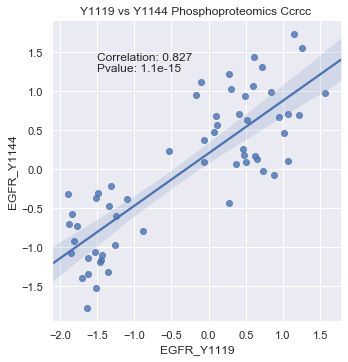

In [74]:
plot_lin_regression(phospho,"EGFR_Y1119","EGFR_Y1144",title = "Y1119 vs Y1144 Phosphoproteomics Ccrcc ", ra_stats = True, show_plot = True)

In [107]:
phospho = ccrcc.join_omics_to_mutations(omics_df_name="phosphoproteomics", mutations_genes="EGFR",
omics_genes=["EGFR"])

phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.map('_'.join)
phospho

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


,EGFR_phosphoproteomics_S1004,EGFR_phosphoproteomics_S1011,EGFR_phosphoproteomics_S1011,EGFR_phosphoproteomics_S1018,EGFR_phosphoproteomics_S1018,EGFR_phosphoproteomics_S1028,EGFR_phosphoproteomics_S1113,EGFR_phosphoproteomics_S1151,EGFR_phosphoproteomics_S1152,EGFR_phosphoproteomics_S642,...,EGFR_phosphoproteomics_T988S989S992,EGFR_phosphoproteomics_Y1016,EGFR_phosphoproteomics_Y1039,EGFR_phosphoproteomics_Y1119,EGFR_phosphoproteomics_Y1144,EGFR_phosphoproteomics_Y963,EGFR_Mutation_,EGFR_Location_,EGFR_Mutation_Status_,Sample_Status_
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00004,NaN,NaN,NaN,NaN,1.536003,NaN,0.822147,NaN,NaN,NaN,...,NaN,NaN,0.285696,NaN,0.999000,-0.013055,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00010,NaN,NaN,0.801866,NaN,-0.157652,NaN,0.568958,NaN,NaN,0.232334,...,NaN,NaN,0.601337,0.412977,0.700833,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00011,NaN,NaN,-0.095909,NaN,-0.405498,NaN,0.280916,NaN,NaN,NaN,...,NaN,NaN,-0.239413,0.271045,-0.430652,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00026,NaN,NaN,0.125693,NaN,1.737029,NaN,0.856229,NaN,NaN,0.155294,...,NaN,NaN,0.444422,1.011546,0.465533,0.460270,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00079,NaN,NaN,0.950772,NaN,NaN,NaN,0.009314,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.000500,NaN,0.040108,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-01646.N,NaN,NaN,-0.369575,NaN,NaN,-1.085531,-1.496740,NaN,NaN,NaN,...,-0.002904,NaN,-0.460898,NaN,-0.768106,NaN,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
C3N-01648.N,-0.404352,NaN,-1.359759,NaN,-1.349698,-0.842504,-1.083848,NaN,NaN,NaN,...,NaN,NaN,-0.639756,NaN,-0.967632,NaN,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
C3N-01649.N,NaN,NaN,0.156604,NaN,-0.854556,NaN,-1.689246,NaN,NaN,0.178980,...,-0.158102,NaN,-0.199191,-1.481650,-0.304552,-0.025014,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal


In [112]:
phospho = phospho.loc[phospho['Sample_Status_'] == "Tumor"]
phospho = phospho[["EGFR_phosphoproteomics_Y1016","EGFR_phosphoproteomics_Y1039","EGFR_phosphoproteomics_Y1119","EGFR_phosphoproteomics_Y1144", "EGFR_phosphoproteomics_Y963","Sample_Status_"]]
phospho

,EGFR_phosphoproteomics_Y1016,EGFR_phosphoproteomics_Y1039,EGFR_phosphoproteomics_Y1119,EGFR_phosphoproteomics_Y1144,EGFR_phosphoproteomics_Y963,Sample_Status_
Patient_ID,,,,,,
C3L-00004,NaN,0.285696,NaN,0.999000,-0.013055,Tumor
C3L-00010,NaN,0.601337,0.412977,0.700833,NaN,Tumor
C3L-00011,NaN,-0.239413,0.271045,-0.430652,NaN,Tumor
C3L-00026,NaN,0.444422,1.011546,0.465533,0.460270,Tumor
C3L-00079,NaN,NaN,-0.000500,NaN,0.040108,Tumor
...,...,...,...,...,...,...
C3N-01646,NaN,-0.160831,NaN,-0.404793,NaN,Tumor
C3N-01648,NaN,-0.413072,NaN,-0.650702,NaN,Tumor
C3N-01649,NaN,0.353399,-0.059095,0.369224,-0.250412,Tumor


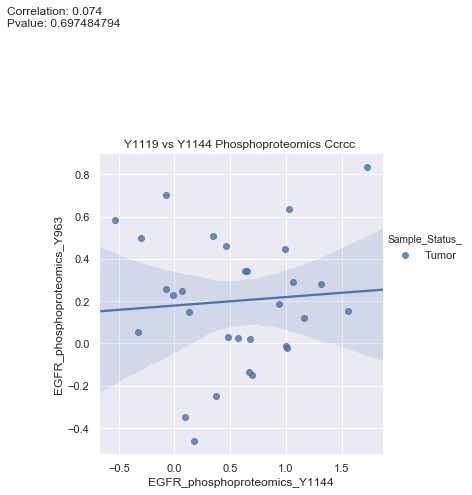

In [116]:
plot_lin_regression(phospho,"EGFR_phosphoproteomics_Y1144","EGFR_phosphoproteomics_Y963","Sample_Status_", title = "Y1119 vs Y1144 Phosphoproteomics Ccrcc ", ra_stats = True, show_plot = True)

In [133]:
phospho = colon.join_omics_to_mutations(omics_df_name="phosphoproteomics", mutations_genes="EGFR",
omics_genes=["EGFR"])

phospho.columns = phospho.columns.droplevel(2)
#phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.map('_'.join)
phospho.filter(like='EGFR_phosphoproteomics_Y', axis=1)
phospho[["EGFR_phosphoproteomics_Y1092","EGFR_phosphoproteomics_Y1197","EGFR_phosphoproteomics_Y1172","Sample_Status_"]]
phospho[["EGFR_phosphoproteomics_Y1172"]].dropna()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: phosphoproteomics data was not found for the following samples, so phosphoproteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


,EGFR_phosphoproteomics_Y1172
Patient_ID,
01CO006,-0.421
09CO011,-0.223
09CO013,-1.187
09CO018,0.137
11CO021,-1.055
11CO037,-0.155
11CO054,-0.445
11CO057,-0.075
14CO005,-0.320


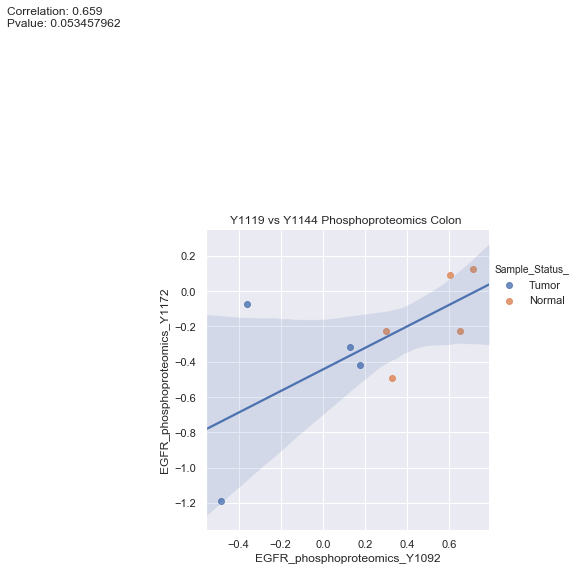

In [134]:
plot_lin_regression(phospho,"EGFR_phosphoproteomics_Y1092","EGFR_phosphoproteomics_Y1172","Sample_Status_",title = "Y1119 vs Y1144 Phosphoproteomics Colon ", ra_stats = True, show_plot = True)

In [144]:
phospho = hnscc.join_omics_to_mutations(omics_df_name="phosphoproteomics", mutations_genes="EGFR",
omics_genes=["EGFR"])

phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.map('_'.join)
phospho
phospho.filter(like='EGFR_phosphoproteomics_Y', axis=1)
phospho = phospho[["EGFR_phosphoproteomics_Y1092","EGFR_phosphoproteomics_Y1197","EGFR_phosphoproteomics_Y1172","EGFR_phosphoproteomics_Y1110","Sample_Status_"]]
#phospho[["EGFR_phosphoproteomics_Y1172"]].dropna()
phospho

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


,EGFR_phosphoproteomics_Y1092,EGFR_phosphoproteomics_Y1197,EGFR_phosphoproteomics_Y1172,EGFR_phosphoproteomics_Y1110,Sample_Status_
Patient_ID,,,,,
C3L-00977,17.473013,23.960771,20.292057,NaN,Tumor
C3L-00987,NaN,21.464089,18.218061,NaN,Tumor
C3L-00994,16.886517,22.517973,19.119405,NaN,Tumor
C3L-00995,NaN,22.753777,NaN,NaN,Tumor
C3L-00997,NaN,21.358591,18.056164,16.956105,Tumor
...,...,...,...,...,...
C3N-04275.N,16.021245,21.586085,18.194347,NaN,Normal
C3N-04276.N,NaN,23.139368,19.801748,18.338160,Normal
C3N-04277.N,NaN,22.302164,NaN,18.531959,Normal


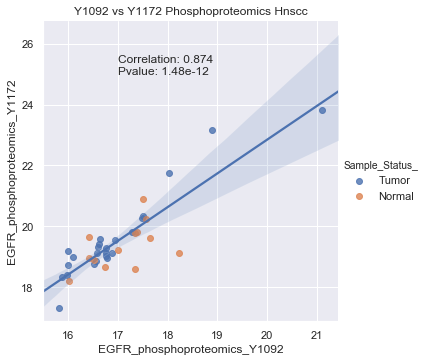

In [154]:
plot_lin_regression(phospho,"EGFR_phosphoproteomics_Y1092","EGFR_phosphoproteomics_Y1172","Sample_Status_",title = "Y1092 vs Y1172 Phosphoproteomics Hnscc", ra_stats = True, show_plot = True)

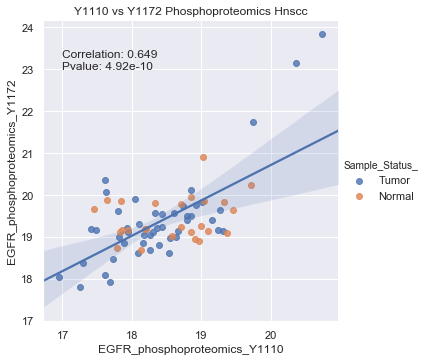

In [156]:
plot_lin_regression(phospho,"EGFR_phosphoproteomics_Y1110","EGFR_phosphoproteomics_Y1172","Sample_Status_",title = "Y1110 vs Y1172 Phosphoproteomics Hnscc", ra_stats = True, show_plot = True)

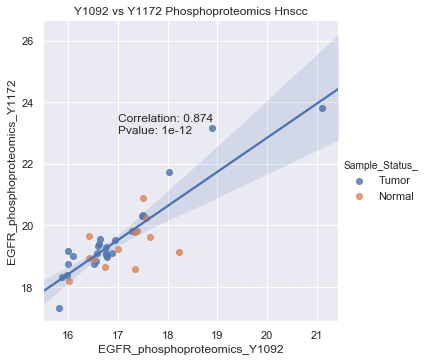

In [157]:
plot_lin_regression(phospho,"EGFR_phosphoproteomics_Y1092","EGFR_phosphoproteomics_Y1172","Sample_Status_",title = "Y1092 vs Y1172 Phosphoproteomics Hnscc", ra_stats = True, show_plot = True)

In [161]:
phospho = luad.join_omics_to_mutations(omics_df_name="phosphoproteomics", mutations_genes="EGFR",
omics_genes=["EGFR"])

phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.map('_'.join)
phospho
phospho.filter(like='EGFR_phosphoproteomics_Y', axis=1)
phospho = phospho[["EGFR_phosphoproteomics_Y1092","EGFR_phosphoproteomics_Y1197","EGFR_phosphoproteomics_Y1172","Sample_Status_"]]
#phospho[["EGFR_phosphoproteomics_Y1172"]].dropna()
phospho

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


,EGFR_phosphoproteomics_Y1092,EGFR_phosphoproteomics_Y1197,EGFR_phosphoproteomics_Y1172,Sample_Status_
Patient_ID,,,,
C3L-00001,NaN,8.5140,5.9688,Tumor
C3L-00009,-2.0647,-1.3295,-1.0692,Tumor
C3L-00080,NaN,-2.1724,NaN,Tumor
C3L-00083,NaN,-2.2124,-2.7310,Tumor
C3L-00093,NaN,0.7454,-0.7893,Tumor
...,...,...,...,...
C3N-02582.N,-1.0362,-1.5172,0.0284,Normal
C3N-02586.N,NaN,-0.7018,-1.7999,Normal
C3N-02587.N,NaN,0.2225,-1.0415,Normal


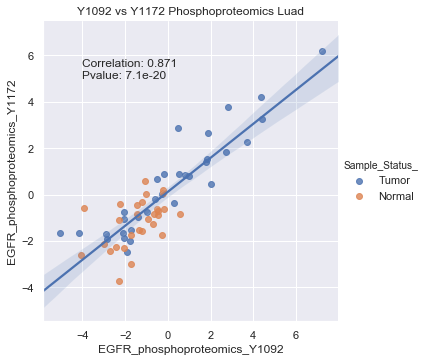

In [169]:
plot_lin_regression(phospho,"EGFR_phosphoproteomics_Y1092","EGFR_phosphoproteomics_Y1172","Sample_Status_",title = "Y1092 vs Y1172 Phosphoproteomics Luad", ra_stats = True, show_plot = True)

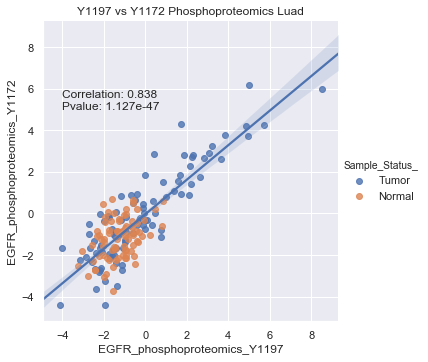

In [178]:
plot_lin_regression(phospho,"EGFR_phosphoproteomics_Y1197","EGFR_phosphoproteomics_Y1172","Sample_Status_",title = "Y1197 vs Y1172 Phosphoproteomics Luad", ra_stats = True, show_plot = True)

In [180]:
phospho = Lscc.join_omics_to_mutations(omics_df_name="phosphoproteomics", mutations_genes="EGFR",
omics_genes=["EGFR"])

phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.map('_'.join)
phospho
phospho.filter(like='EGFR_phosphoproteomics_Y', axis=1)
phospho = phospho[["EGFR_phosphoproteomics_Y1197","EGFR_phosphoproteomics_Y1172","Sample_Status_"]]
#phospho[["EGFR_phosphoproteomics_Y1172"]].dropna()
#phospho

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 208 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


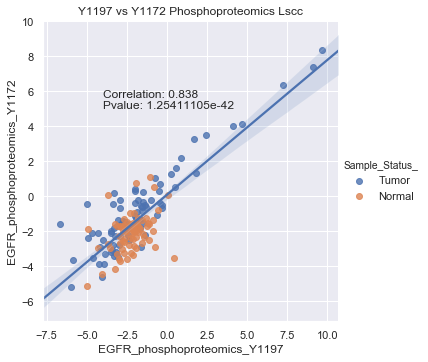

In [182]:
plot_lin_regression(phospho,"EGFR_phosphoproteomics_Y1197","EGFR_phosphoproteomics_Y1172","Sample_Status_",title = "Y1197 vs Y1172 Phosphoproteomics Lscc", ra_stats = True, show_plot = True)

In [195]:
phospho = Ovar.join_omics_to_mutations(omics_df_name="phosphoproteomics", mutations_genes="EGFR",
omics_genes=["EGFR"])

phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.droplevel(2)
phospho.columns = phospho.columns.map('_'.join)
phospho
phospho.filter(like='EGFR_phosphoproteomics_Y', axis=1)
phospho = phospho[["EGFR_phosphoproteomics_Y1197","EGFR_phosphoproteomics_Y1172","Sample_Status_"]]
#phospho[["EGFR_phosphoproteomics_Y1197"]].dropna()
phospho.dropna()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 102 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


,EGFR_phosphoproteomics_Y1197,EGFR_phosphoproteomics_Y1172,Sample_Status_
Patient_ID,,,


In [194]:
plot_lin_regression(phospho,"EGFR_phosphoproteomics_Y1197","EGFR_phosphoproteomics_Y1172","Sample_Status_",title = "Y1197 vs Y1172 Phosphoproteomics Ovar", ra_stats = True, show_plot = True)

ValueError: x and y must have length at least 2.